# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

# Load and Preprocess Data

## Load Preprocessed Features and Targets

In [2]:
X = pd.read_csv("/content/X_preprocessed.csv")
y = pd.read_csv("/content/y_preprocessed.csv").values.ravel()

## Split Data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree

## Initial Decision Tree

### Initial Decision Tree Training and Prediction

In [4]:
# Train Decision Tree with basic parameters
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=6, min_samples_leaf=8, random_state=100)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [5]:
# Initial Predictions
y_pred = dt_model.predict(X_test)

### Initial Decision Tree Evaluatuion

In [8]:
# Performance
print("Initial Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")

Initial Decision Tree Performance:
Accuracy: 0.8933
Precision: 0.9126
Recall: 0.8922


In [9]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       579
           1       0.91      0.89      0.90       714

    accuracy                           0.89      1293
   macro avg       0.89      0.89      0.89      1293
weighted avg       0.89      0.89      0.89      1293



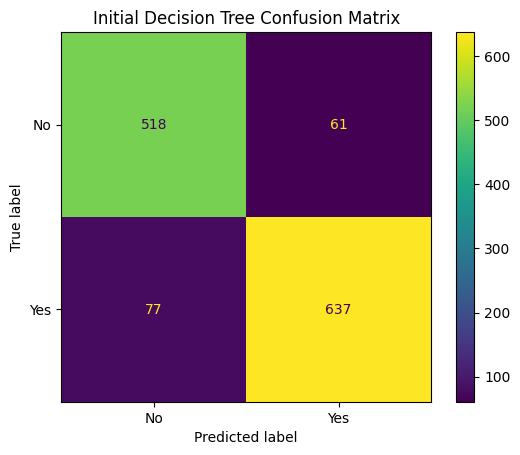

In [10]:
# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=["No", "Yes"]).plot()
plt.title("Initial Decision Tree Confusion Matrix")
plt.show()

## Tuned Decision Tree

### Huperparameter Tuning

In [11]:
# Use `GridSearchCV` to optimize `criterion`, `max_depth`, `min_samples_split`, and `min_samples_leaf`
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8]
}

In [12]:
# Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=100), param_grid, cv=5)

In [13]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10]})

### Best Model

In [14]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

### Tuned Decision Tree Performance Evaluation

In [15]:
# Performance
print("\nTuned Decision Tree Performance:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")


Tuned Decision Tree Performance:
Best Parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score: 0.9361
Test Accuracy: 0.9404


In [16]:
# Classification Report
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       579
           1       0.94      0.96      0.95       714

    accuracy                           0.94      1293
   macro avg       0.94      0.94      0.94      1293
weighted avg       0.94      0.94      0.94      1293



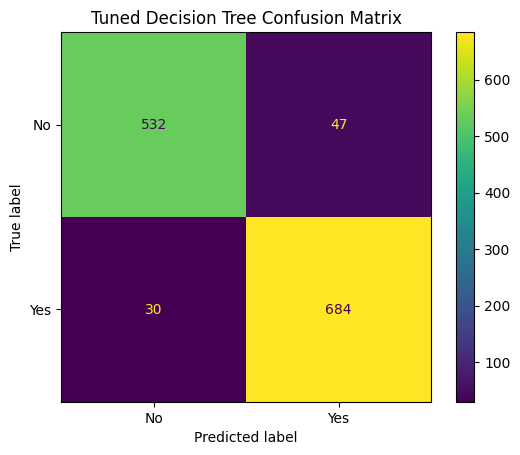

In [17]:
# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_best), display_labels=["No", "Yes"]).plot()
plt.title("Tuned Decision Tree Confusion Matrix")
plt.show()

## Feature Importance

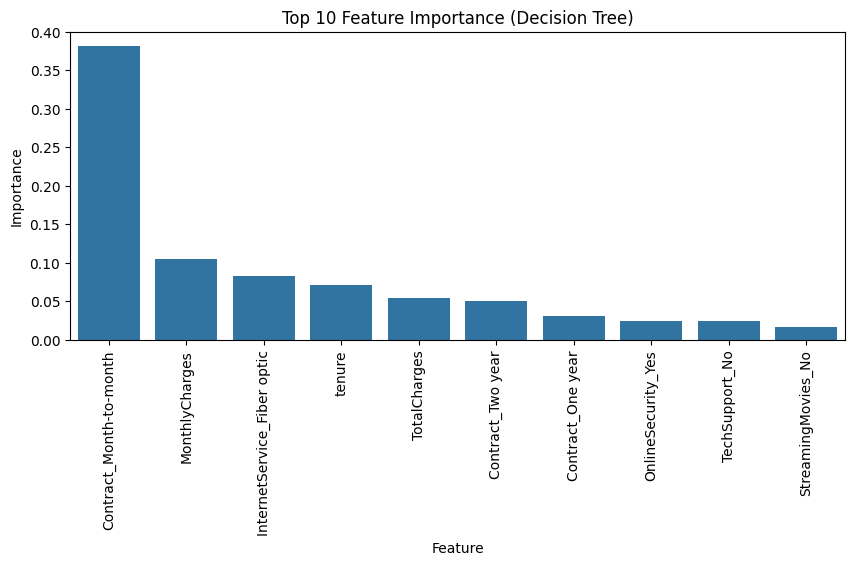

In [18]:
# Visualize top 10 feature importances
imp_features = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
top_10 = imp_features.nlargest(10, 'Importance')
plt.figure(figsize=(10, 4))
sns.barplot(data=top_10, x='Feature', y='Importance')
plt.xticks(rotation=90)
plt.title("Top 10 Feature Importance (Decision Tree)")
plt.show()

## ROC Curve

In [19]:
fpr, tpr, _ = roc_curve(y_test, y_pred_best)
roc_auc = auc(fpr, tpr)

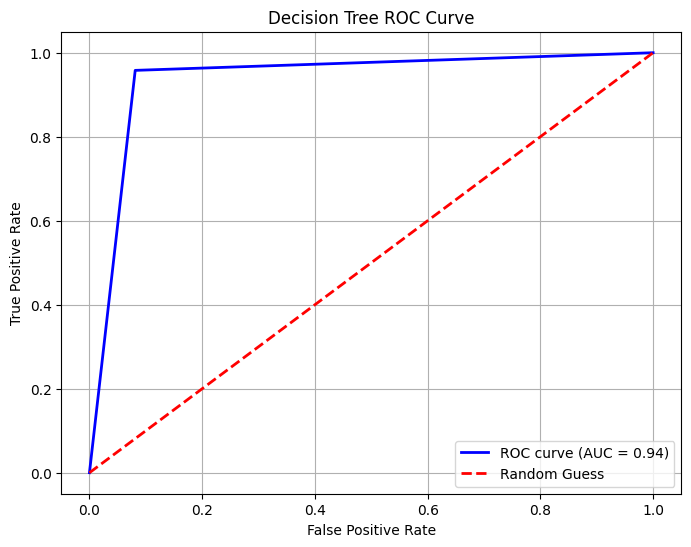

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()